In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [3]:
market=pd.read_csv("Market_Basket_Optimisation.csv", header = None)
market

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


The market basket dataset conntains 20 columns of categorical data which represent the purchases in a market.

In [5]:
market.shape

(7501, 20)

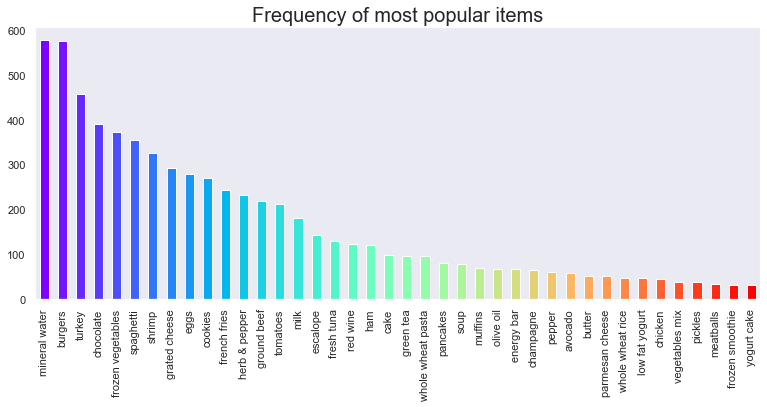

In [6]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
market[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

The most popular items are mineral water, burgers and turkey. 

In [7]:
import networkx as nx
market['food'] = 'Food'
food = market.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

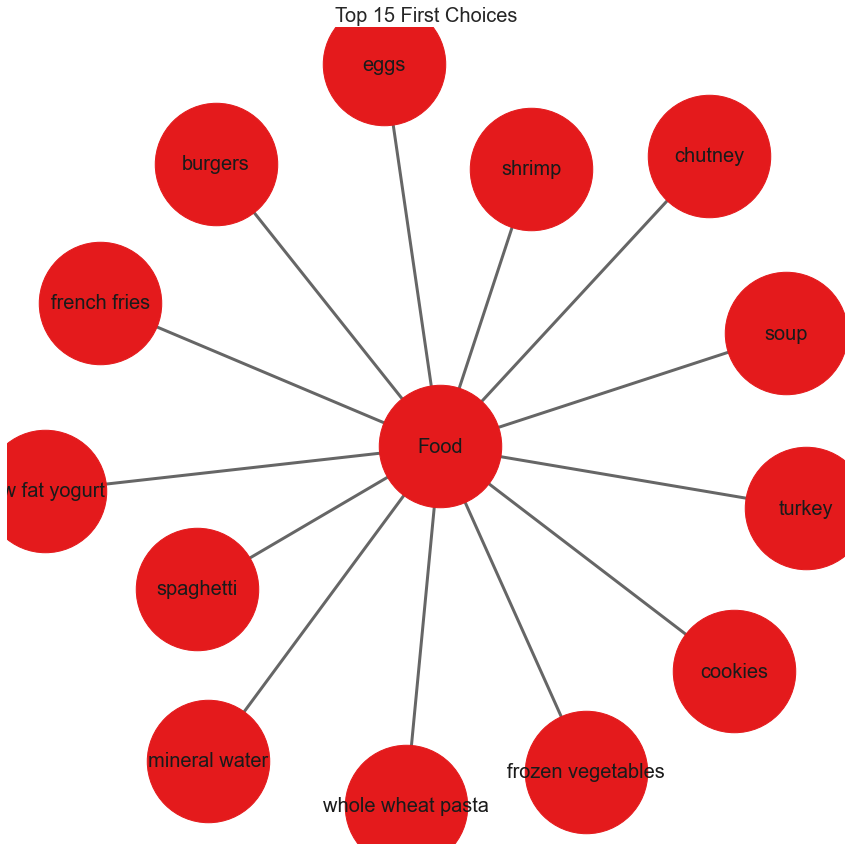

In [8]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 15)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

This figure represents the most popular food items in baskets.

In [10]:
transactions = []
for i in range(0, len(market)):
    transactions.append([str(market.values[i,j]) for j in range(0, len(market.columns))])

In [11]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil',
  'Food']]

In [12]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [13]:
print('# of items:',len(items))
print(list(items))

# of items: 122
['cottage cheese', 'rice', 'mineral water', 'turkey', 'champagne', 'meatballs', 'melons', 'black tea', 'barbecue sauce', 'mint green tea', 'chili', 'fromage blanc', 'water spray', 'babies food', 'cooking oil', 'fresh bread', 'chicken', 'pickles', 'french fries', 'nonfat milk', 'avocado', 'butter', 'energy bar', 'pancakes', 'cider', 'mayonnaise', 'strong cheese', 'soda', 'sandwich', 'antioxydant juice', 'frozen smoothie', 'herb & pepper', 'chocolate bread', 'spaghetti', 'tea', 'whole wheat pasta', 'cake', 'Food', 'salad', 'green tea', 'burgers', 'burger sauce', 'strawberries', 'blueberries', 'french wine', 'mushroom cream sauce', 'corn', 'green beans', 'mint', 'cereals', 'escalope', 'zucchini', 'body spray', 'candy bars', 'cauliflower', 'light mayo', ' asparagus', 'vegetables mix', 'mashed potato', 'gums', 'oil', 'brownies', 'grated cheese', 'chocolate', 'light cream', 'ketchup', 'fresh tuna', 'red wine', 'carrots', 'bramble', 'spinach', 'dessert wine', 'muffins', 'tomat

In [14]:
if 'nan' in items: items.remove('nan')
print(list(items))

['cottage cheese', 'rice', 'mineral water', 'turkey', 'champagne', 'meatballs', 'melons', 'black tea', 'barbecue sauce', 'mint green tea', 'chili', 'fromage blanc', 'water spray', 'babies food', 'cooking oil', 'fresh bread', 'chicken', 'pickles', 'french fries', 'nonfat milk', 'avocado', 'butter', 'energy bar', 'pancakes', 'cider', 'mayonnaise', 'strong cheese', 'soda', 'sandwich', 'antioxydant juice', 'frozen smoothie', 'herb & pepper', 'chocolate bread', 'spaghetti', 'tea', 'whole wheat pasta', 'cake', 'Food', 'salad', 'green tea', 'burgers', 'burger sauce', 'strawberries', 'blueberries', 'french wine', 'mushroom cream sauce', 'corn', 'green beans', 'mint', 'cereals', 'escalope', 'zucchini', 'body spray', 'candy bars', 'cauliflower', 'light mayo', ' asparagus', 'vegetables mix', 'mashed potato', 'gums', 'oil', 'brownies', 'grated cheese', 'chocolate', 'light cream', 'ketchup', 'fresh tuna', 'red wine', 'carrots', 'bramble', 'spinach', 'dessert wine', 'muffins', 'tomato juice', 'flax 

In [18]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,asparagus,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


Every item become a single column (feature) and if it is present in the basket, it is presented by True. If it's not, it is presented by False. The column 'Nan' was deleted.  

Finding rules to associate the items is not simple. That's why we use apriori algorithm. In fact, this algorithm is based on on the concept that a subset of a frequent itemset must also be a frequent itemset. Frequent Itemset is an itemset whose support value is greater than a threshold value(support).There are two elements of these rules:


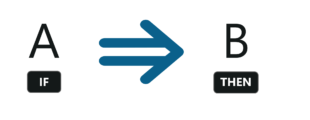

Antecedent (IF): This is an item/group of items that are typically found in the Itemsets or Datasets.

Consequent (THEN): This comes along as an item with an Antecedent/group of Antecedents.

But here comes a constraint. Suppose you made a rule about an item, you still have around 9999 items to consider for rule-making. This is where the Apriori Algorithm comes into play. So before we understand the Apriori Algorithm, let’s understand the math behind it. There are 3 ways to measure association:

Support
Confidence
Lift
 
 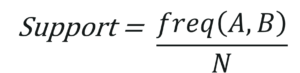

Support: It gives the fraction of transactions which contains item A and B. Basically Support tells us about the frequently bought items or the combination of items bought frequently.



So with this, we can filter out the items that have a low frequency.

 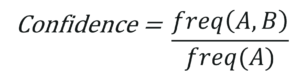

Confidence: It tells us how often the items A and B occur together, given the number times A occurs.

Now suppose, after filtering you still have around 5000 items left. Creating association rules for them is a practically impossible task for anyone. This is where the concept of lift comes into play.

 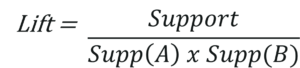

Lift: Lift indicates the strength of a rule over the random occurrence of A and B. It basically tells us the strength of any rule.


In [21]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
frequent_itemsets=apriori(onehot, min_support = 0.01, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,1.000000,(Food),1
1,0.020397,(almonds),1
2,0.033329,(avocado),1
3,0.010799,(barbecue sauce),1
4,0.014265,(black tea),1
...,...,...,...
510,0.011065,"(ground beef, milk, mineral water, Food)",4
511,0.017064,"(ground beef, mineral water, spaghetti, Food)",4
512,0.015731,"(milk, mineral water, spaghetti, Food)",4
513,0.010265,"(olive oil, mineral water, spaghetti, Food)",4


Support quantifies the frequency of an itemset: how many times the item appear in a set of transactions ? Well, food was present in all the transactions since support(food)=1. While, avocado was present in 3% of the transactions. Olive oil, mineral water, spaghetti and food were present together in 1% of the transactions.

In [22]:
frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
498,0.013465,"(mineral water, chocolate, eggs, Food)",4
499,0.010532,"(eggs, chocolate, spaghetti, Food)",4
500,0.010932,"(ground beef, mineral water, chocolate, Food)",4
501,0.013998,"(milk, mineral water, chocolate, Food)",4
502,0.010932,"(milk, chocolate, spaghetti, Food)",4
503,0.015865,"(mineral water, chocolate, spaghetti, Food)",4
504,0.010132,"(ground beef, mineral water, eggs, Food)",4
505,0.013065,"(milk, mineral water, eggs, Food)",4
506,0.014265,"(mineral water, spaghetti, eggs, Food)",4
507,0.010132,"(french fries, mineral water, spaghetti, Food)",4


In [23]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,1.000000,(Food),1
1,0.020397,(almonds),1
2,0.033329,(avocado),1
3,0.010799,(barbecue sauce),1
4,0.014265,(black tea),1
...,...,...,...
71,0.016531,(white wine),1
72,0.029463,(whole wheat pasta),1
73,0.058526,(whole wheat rice),1
74,0.011465,(yams),1


In [26]:
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911


Support quantifies the frequency of an itemset: how many times the item appear in a set of transactions ? Well, food was present in all the transactions since support(food)=1 followed by mineral water (20% of the transactions).

In order to extract rules based on other metrics like confidence, we can use association_rules from mlxtend.frequent_patterns library.

In [29]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.5)  # associate itemsets with confidence over 50%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(Food),0.020397,1.000000,0.020397,1.00000,1.000000,0.000000,inf
1,(avocado),(Food),0.033329,1.000000,0.033329,1.00000,1.000000,0.000000,inf
2,(barbecue sauce),(Food),0.010799,1.000000,0.010799,1.00000,1.000000,0.000000,inf
3,(black tea),(Food),0.014265,1.000000,0.014265,1.00000,1.000000,0.000000,inf
4,(body spray),(Food),0.011465,1.000000,0.011465,1.00000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
258,"(ground beef, milk)","(mineral water, Food)",0.021997,0.238368,0.011065,0.50303,2.110308,0.005822,1.532552
259,"(ground beef, mineral water, spaghetti)",(Food),0.017064,1.000000,0.017064,1.00000,1.000000,0.000000,inf
260,"(milk, mineral water, spaghetti)",(Food),0.015731,1.000000,0.015731,1.00000,1.000000,0.000000,inf
261,"(olive oil, mineral water, spaghetti)",(Food),0.010265,1.000000,0.010265,1.00000,1.000000,0.000000,inf


It seems that everytime a person buys ground beef and milk, there is 24 % chance he buys mineral water and food with them (confidence=0.23). This rule is very strong since the lift is higher than 1 (2.1).